**Gender Classification**

Importing the Modules


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Data Collection and Data Processing

In [5]:
#loading the dataset to a pandas Dataframe

gender= pd.read_csv('/content/gender_classification_v7.csv')

gender.head()



,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
# number of rows and columns

gender.shape

(5001, 8)

In [7]:
 #describe --> statistical measures of the data

gender.describe() 

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Converting the text data to numerical values

In [8]:
gender.replace({"gender":{'Male':0,'Female':1}}, inplace=True)
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


Separating features and Target

In [9]:
Xp=gender.drop(columns=['long_hair','forehead_width_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long','gender'], axis=1)
X=gender.drop(columns=['gender'], axis=1)
Y=gender['gender']
print(X)
print(Y)

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_l

**Data Visualization**

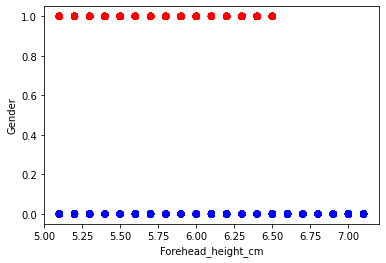

In [10]:
#Scatter plot

plt.scatter(Xp,Y,c=Y,cmap='bwr')
plt.xlabel('Forehead_height_cm')
plt.ylabel('Gender')
plt.show()

<Axes: >

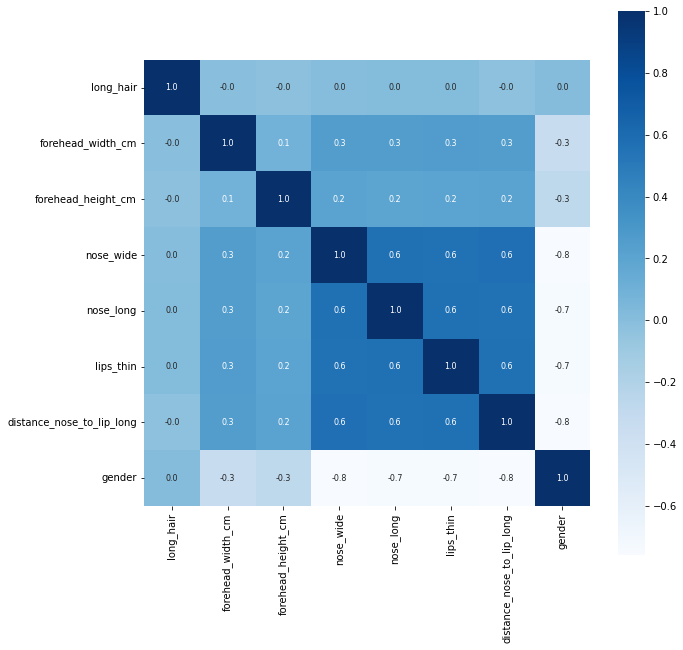

In [11]:
#Heatmap

correlation = gender.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data into training data and Test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 10)
print(X.shape,Y.shape,X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(5001, 7) (5001,) (4000, 7) (1001, 7) (4000,) (1001,)


Model-1 Training

**Logistic Regression**

In [13]:
# loading the model

model_1=LogisticRegression()

In [14]:
#Fitting the model with X_train,Y_train

model_1.fit(X_train,Y_train)


LogisticRegression()

Evaluation on Prediction Data

In [15]:
ypre=model_1.predict(X_test)
print(ypre)

[1 1 1 ... 1 0 0]


Confusion Matrix is
 [[495  14]
 [ 12 480]]


(495, 480, 12, 480)

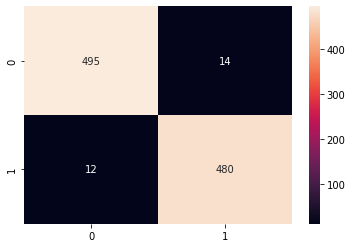

In [16]:
#Calculating Confusion Matrix

Confusion_matrix_model_1=confusion_matrix(Y_test,ypre)

print("Confusion Matrix is\n",Confusion_matrix_model_1)

sns.heatmap(Confusion_matrix_model_1,annot=True,fmt="d")

TN=Confusion_matrix_model_1[0,0]
TP=Confusion_matrix_model_1[0,1]
FN=Confusion_matrix_model_1[1,0]
TP=Confusion_matrix_model_1[1,1]

TN,TP,FN,TP

In [17]:
#Calculating classification Report

f1_Score_model_1=classification_report(Y_test,ypre)

print("classification Report (f1 Score) is\n",f1_Score_model_1)

classification Report (f1 Score) is
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       509
           1       0.97      0.98      0.97       492

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [18]:
#Calculating Accuracy Score

Accuracy_score_model_1=accuracy_score(Y_test,ypre)*100

print("Accuracy Score is\n",Accuracy_score_model_1)

Accuracy Score is
 97.40259740259741


Model-2 Training

**Decision Tree Classifier**

In [19]:
from sklearn.tree import DecisionTreeClassifier
# loading the model

# Decision tree with gini
  
# Creating the classifier object

clf_gini=DecisionTreeClassifier(criterion ="gini",
            random_state=10,max_depth=3,min_samples_leaf=5)
  
# Performing training

clf_gini.fit(X_train, Y_train)
  

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=10)

In [20]:

# Decision tree with entropy

# Creating the classifier object
clf_entropy = DecisionTreeClassifier(
        criterion="entropy",random_state = 10,
        max_depth=3, min_samples_leaf = 5)

# Performing training

clf_entropy.fit(X_train,Y_train)
    
  

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

In [21]:
# Predicton on test with giniIndex

y_pred_g=clf_gini.predict(X_test)
print("Predicted values based on gini-index:")
print(y_pred_g)

 

Predicted values based on gini-index:
[1 1 1 ... 1 0 1]


In [22]:
#Calculating Confusion Matrix based on gini-index

Confusion_matrix_model_2_g=confusion_matrix(Y_test, y_pred_g)   
print("Confusion Matrix based on gini-index:\n",Confusion_matrix_model_2_g)

#Calculating Accuracy Score based on gini-index
   
Accuracy_score_model_2_g=accuracy_score(Y_test,y_pred_g)*100
print ("Accuracy score  based on gini-index:\n",Accuracy_score_model_2_g)

#Calculating classification Report based on gini-index

f1_Score_model_2_g=classification_report(Y_test,y_pred_g) 
print("f1 score Report  based on gini-index:\n",f1_Score_model_2_g)
   

Confusion Matrix based on gini-index:
 [[491  18]
 [ 23 469]]
Accuracy score  based on gini-index:
 95.90409590409591
f1 score Report  based on gini-index:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       509
           1       0.96      0.95      0.96       492

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



(491, 18, 23, 469)

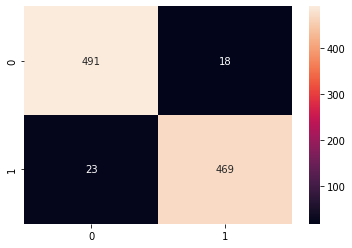

In [23]:
sns.heatmap(Confusion_matrix_model_2_g,annot=True,fmt="d")

TN=Confusion_matrix_model_2_g[0,0]
FP=Confusion_matrix_model_2_g[0,1]
FN=Confusion_matrix_model_2_g[1,0]
TP=Confusion_matrix_model_2_g[1,1]

TN,FP,FN,TP

In [24]:
# Decision tree with entropy
  
# Creating the classifier object

clf_entropy=DecisionTreeClassifier(criterion ="entropy",
            random_state=10,max_depth=3,min_samples_leaf=5)
  
# Performing training

clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

In [25]:
# Predicton on test with entropy

y_pred_e=clf_entropy.predict(X_test)
print("Predicted values based on entropy:")
print(y_pred_e)

Predicted values based on entropy:
[1 1 1 ... 1 0 1]


In [26]:
#Calculating Confusion Matrix based on entropy

Confusion_matrix_model_2_e=confusion_matrix(Y_test, y_pred_e)   
print("Confusion Matrix based on entropy:\n",Confusion_matrix_model_2_e)

#Calculating Accuracy Score based on entropy
   
Accuracy_score_model_2_e=accuracy_score(Y_test,y_pred_e)*100
print ("Accuracy score  based on entropy:\n",Accuracy_score_model_2_e)

#Calculating classification Report based on entropy

f1_Score_model_2_e=classification_report(Y_test,y_pred_e) 
print("f1 score Report  based on entropy:\n",f1_Score_model_2_e)
   

Confusion Matrix based on entropy:
 [[486  23]
 [ 23 469]]
Accuracy score  based on entropy:
 95.4045954045954
f1 score Report  based on entropy:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       509
           1       0.95      0.95      0.95       492

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



(486, 23, 23, 469)

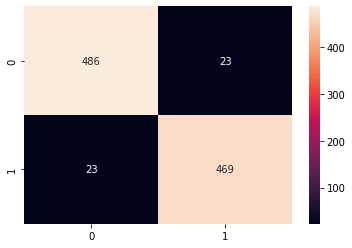

In [27]:
sns.heatmap(Confusion_matrix_model_2_e,annot=True,fmt="d")

TN=Confusion_matrix_model_2_e[0,0]
FP=Confusion_matrix_model_2_e[0,1]
FN=Confusion_matrix_model_2_e[1,0]
TP=Confusion_matrix_model_2_e[1,1]

TN,FP,FN,TP

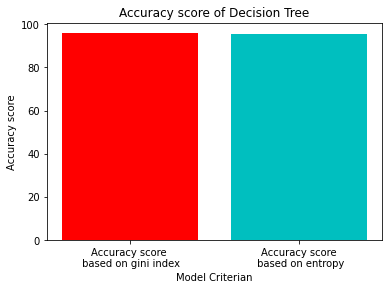

In [28]:
model=[Accuracy_score_model_2_g,Accuracy_score_model_2_e]
color_code = ['r','c']
plt.bar(['Accuracy score \n based on gini index','Accuracy score\n based on entropy'],model,color = color_code)
plt.title('Accuracy score of Decision Tree')
plt.xlabel('Model Criterian')
plt.ylabel('Accuracy score')
plt.show()



Model-3 Training

**XGBoost Classifier**

In [29]:
import xgboost as xgb

# loading the model

model_3=xgb.XGBClassifier()

In [30]:
#Fitting the model with X_train,Y_train

model_3.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Evaluation on Prediction Data

In [36]:
ypre_x=model_3.predict(X_test)
print(ypre_x)

[1 1 1 ... 1 0 1]


Confusion Matrix is
 [[500   9]
 [ 14 478]]


(500, 478, 14, 478)

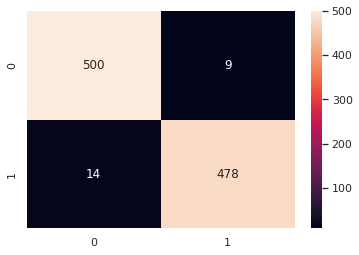

In [37]:
#Calculating Confusion Matrix

Confusion_matrix_model_3=confusion_matrix(Y_test,ypre_x)

print("Confusion Matrix is\n",Confusion_matrix_model_3)

sns.heatmap(Confusion_matrix_model_3,annot=True,fmt="d")

TN=Confusion_matrix_model_3[0,0]
TP=Confusion_matrix_model_3[0,1]
FN=Confusion_matrix_model_3[1,0]
TP=Confusion_matrix_model_3[1,1]

TN,TP,FN,TP

In [38]:
#Calculating classification Report

f1_Score_model_3=classification_report(Y_test,ypre_x)

print("classification Report (f1 Score) is\n",f1_Score_model_3)

classification Report (f1 Score) is
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       509
           1       0.98      0.97      0.98       492

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001



In [39]:
#Calculating Accuracy Score

Accuracy_score_model_3=accuracy_score(Y_test,ypre_x)*100

print("Accuracy Score is\n",Accuracy_score_model_3)

Accuracy Score is
 97.7022977022977


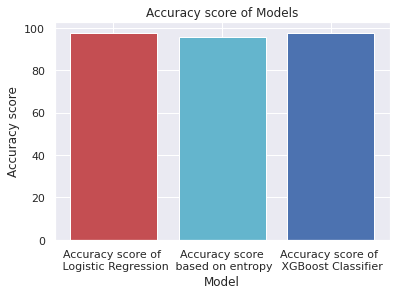

In [41]:
model=[Accuracy_score_model_1,Accuracy_score_model_2_e,Accuracy_score_model_3]
color_code = ['r','c','b']
plt.bar(['Accuracy score of \n Logistic Regression','Accuracy score\n based on entropy','Accuracy score of \n XGBoost Classifier'],model,color = color_code)
plt.title('Accuracy score of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy score')
plt.show()

In [32]:
sns.set()

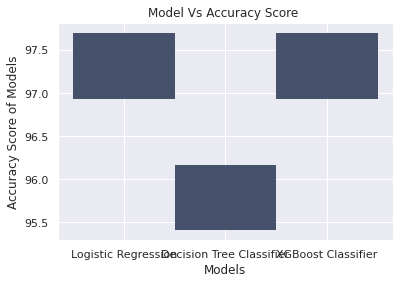

In [42]:
X_p=['Logistic Regression','Decision Tree Classifier','XGBoost Classifier']
Y_p=[Accuracy_score_model_1,Accuracy_score_model_2_e,Accuracy_score_model_3]
sns.histplot(x=X_p,y=Y_p)
plt.xlabel('Models')
plt.ylabel('Accuracy Score of Models')
plt.title("Model Vs Accuracy Score ")
plt.show()

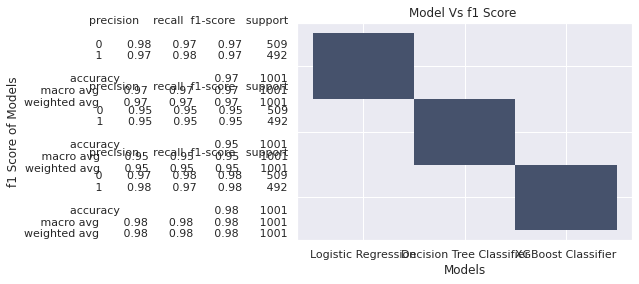

In [44]:
X_f=['Logistic Regression','Decision Tree Classifier','XGBoost Classifier']
Y_f=[f1_Score_model_1,f1_Score_model_2_e,f1_Score_model_3]
sns.histplot(x=X_f,y=Y_f)
plt.xlabel('Models')
plt.ylabel('f1 Score of Models')
plt.title("Model Vs f1 Score ")
plt.show()

**Conclusion**

Model-1

**Logistic Regression**

Accuracy Score is **97.40259740259741**

f1 Score is **0.97**

Model-2

**Decision Tree Classifier**

Accuracy Score based on entropy is **95.4045954045954**

f1 Score is **0.95**

Model-3

**XGBoost Classifier**

Accuracy Score based is **97.7022977022977**

f1 Score is** 0.98**

When Comparing all Model's Accuracy Score & f1 Score values

Model-3 has high  Accuracy Score Value & f1 Score Value

**Result:-**

Model-3

**XGBoost Classifier** fits correctly to this dataset